<a href="https://colab.research.google.com/github/mafatikh/cosmic_mafa/blob/main/Mafa_of_ML_2_Regresi_Lanjutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-2 Regresi Lanjutan

Sebelum mulai:
*   Student yang pakai Colab, silahkan "Save a Copy in Drive" dahulu
*   Student yang pakai Jupyter Notebook, silahkan download code ini dahulu



# Import Library

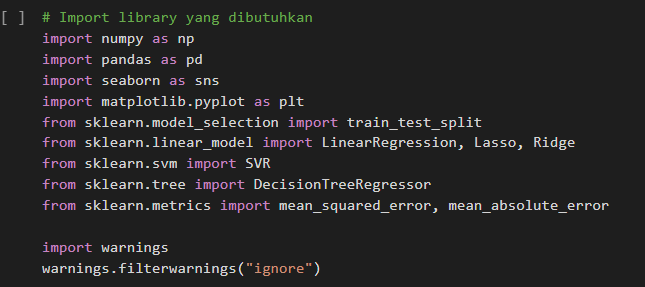

In [5]:
# Tulis di sini
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# Load Dataset
https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv

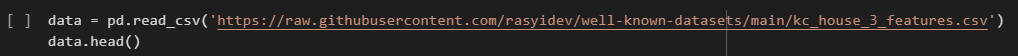

In [7]:
# Tulis di sini
import pandas as pd # Import pandas library and assign it to the alias 'pd'
data = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/kc_house_3_features.csv') # Changed pd.read_cvs to pd.read_csv
data.head() # Call the head function using parenthesis

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


Dataset memiliki 3 feature:
- sqft_living
- sqft_living15
- sqft_above

dan sebuah label, yakni price.

# 1. Analisis Korelasi

Lakukan analisis korelasi terhadap dataset.

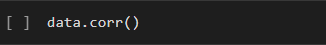

In [8]:
data.corr()


,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


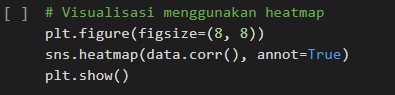

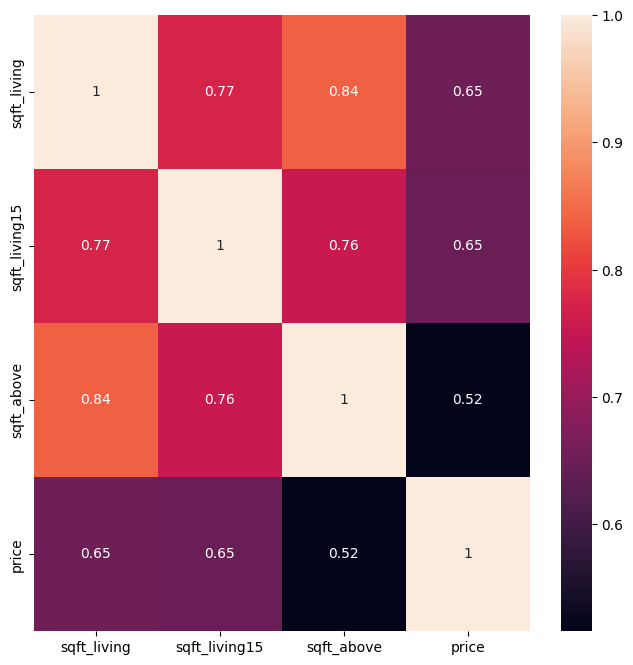

In [10]:
# Import the seaborn library and alias it as 'sns'
import seaborn as sns

# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt


# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

Hasil analisis korelasi menunjukkan bahwa:
- semua feature berkorelasi positif terhadap price
- feature sqft_living dan sqft_living15 memiliki koefisien korelasi tertinggi

# Split Dataset

Split dataset menjadi:
- training data (X_train dan y_train) 80%
- testing data (X_test dan y_test) 20%

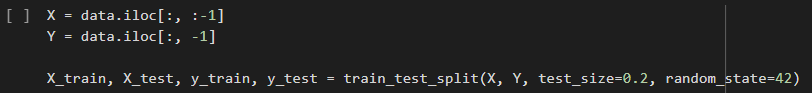

In [11]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

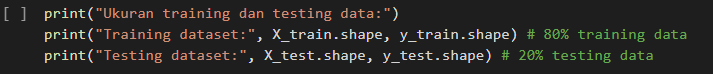

In [13]:
print("Ukuran training dan testing data: ")
print("Training dataset :", X_train.shape, Y_train.shape)# 80% training data
print("Testing dataset: ", X_test.shape, Y_test.shape) # 20% testing data

Ukuran training dan testing data: 
Training dataset : (80, 3) (80,)
Testing dataset:  (20, 3) (20,)


# 2. Modeling

Pada program ini, kita akan melatih lebih dari satu model regresi, antara lain:
- Regresi Linier
- Regresi Lasso
- Regresi Ridge
- Support Vector Regressor (SVR)
- Decision Tree Regressor (DTR)

Latih semua model menggunakan training data (X_train dan y_train)


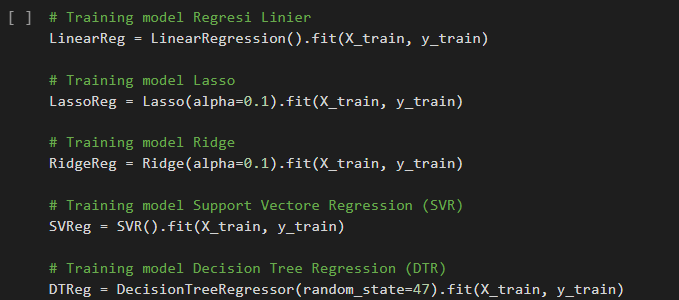

In [17]:
#Training model Regresi Linear
LinearReg = LinearRegression().fit(X_train, Y_train)

#Training model Lasso
LassoReg = Lasso(alpha = 0.1).fit(X_train, Y_train)

#Training model Ridge
RidgeReg = Ridge(alpha = 0.1).fit(X_train, Y_train)

#Training model Support Vectore Regression (SVR)
SVReg = SVR().fit(X_train, Y_train)

#Training model Decision Tree Regression (DTR)
DTReg = DecisionTreeRegressor(random_state=47).fit(X_train, Y_train)


**alpha=0.1** dan **random_state=47** disebut sebagai hyperparameter.

Umumnya, setiap algoritma AI memiliki hyperparameter yang bisa kita setel (tuning) sesuai keinginan.

Setelan hyperparameter yang tepat mampu meningkatkan performa model.

Kunjungi dokumentasi library untuk mempelajari tentang hyperparameter:
- [Regresi Linier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Regresi Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Regresi Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [DTR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

# 3. Evaluasi Model Menggunakan Metric MSE dan R2

Lakukan evaluasi pada semua model yang telah dilatih. Sebelum itu, kita perlu men-generate hasil prediksi tiap model.

Generate:
- hasil prediksi training data (y pred train)
- hasil prediksi testing data (y pred test)

menggunakan model.

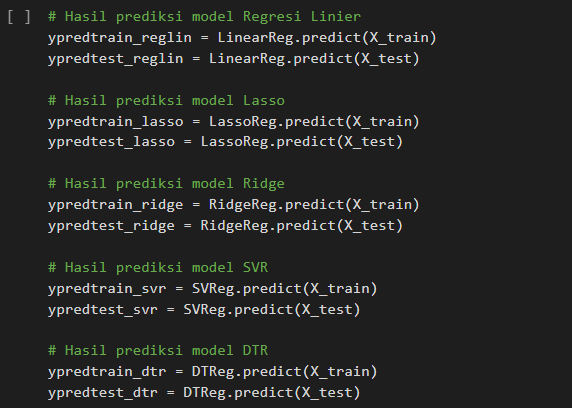

In [19]:
#Hasil Prediksi model Regresi Linear
ypredtrain_reglin = LinearReg.predict(X_train)
ypredtest_reglin = LinearReg.predict(X_test)

#hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(X_train)
ypredtest_lasso = LassoReg.predict(X_test)

#Hasil Prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(X_train)
ypredtest_ridge = RidgeReg.predict(X_test)

#hasil prediksi Support Vectore Regression (SVR)
ypredtrain_svr = SVReg.predict(X_train)
ypredtest_svr = SVReg.predict(X_test)

#hasil prediksi Decision Tree Regression (DTR)
ypredtrain_dtr = DTReg.predict(X_train)
ypredtest_dtr = DTReg.predict(X_test)


Evaluasi pertama dilakukan menggunakan metric MSE.

Bandingkan:
- label training data (y_train) dengan hasil prediksi training data (y pred train)
- label testing data (y_test) dengan hasil prediksi testing data (y pred test)

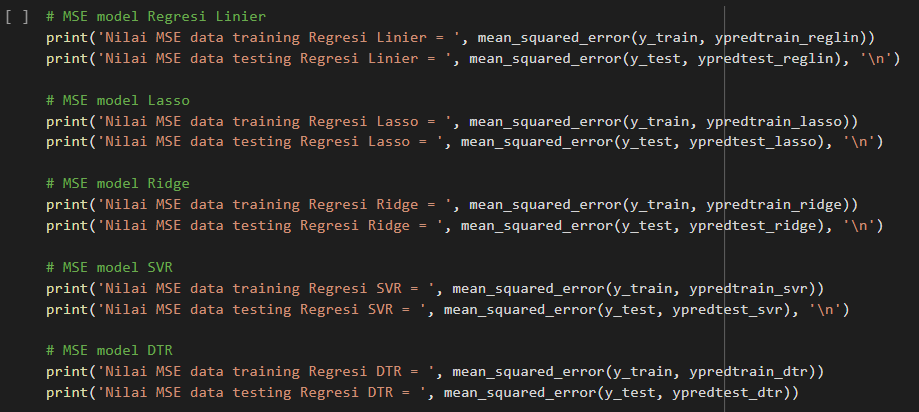

In [21]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(Y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(Y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(Y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(Y_test, ypredtest_lasso), '\n')

# MSE model Ridge
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(Y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(Y_test, ypredtest_ridge), '\n')

# MSE model SVR
print('Nilai MSE data training SVR = ', mean_squared_error(Y_train, ypredtrain_svr))
print('Nilai MSE data testing SVR = ', mean_squared_error(Y_test, ypredtest_svr), '\n')

# MSE model DTR
print('Nilai MSE data training DTR = ', mean_squared_error(Y_train, ypredtrain_dtr))
print('Nilai MSE data testing DTR = ', mean_squared_error(Y_test, ypredtest_dtr), '\n')


Nilai MSE data training Regresi Linier =  51040616225.03679
Nilai MSE data testing Regresi Linier =  32881775262.15838 

Nilai MSE data training Regresi Lasso =  51040616225.03679
Nilai MSE data testing Regresi Lasso =  32881775271.07427 

Nilai MSE data training Regresi Ridge =  51040616225.0368
Nilai MSE data testing Regresi Ridge =  32881775254.902454 

Nilai MSE data training SVR =  113673471256.08711
Nilai MSE data testing SVR =  37393496977.231895 

Nilai MSE data training DTR =  455625000.0
Nilai MSE data testing DTR =  40958648000.0 



Hasil evaluasi MSE menunjukkan bahwa:


Model | MSE traing data | MSE testing data | Keputusan
---|---|---|---|
Regresi Linier | 51040616225.03679 | 32881775262.15838 | -
Regresi Lasso | 51040616225.0368 | 32881775271.07428 | -
Regresi Ridge | 32881775271.07428 | 32881775254.902466 | -
SVR | 113673471256.08711 | 37393496977.231895 | Overfit
DTR | 455625000.0 | 40958648000.0 | Goodfit

Model DTR merupakan model terbaik karena MSE training dan testing tidak jauh berbeda.

> **Note**: Regresi Linier, Lasso, dan Ridge memiliki MSE training yang lebih tinggi dibanding MSE testing. Hal ini bisa terjadi karena data kita berjumlah sedikit. Salah satu solusinya adalah dengan menambah jumlah data dalam dataset.

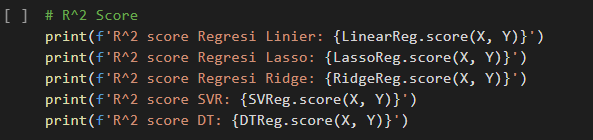

In [22]:
# R^2 Score
print(f'R^2 score Regresi Linier : {LinearReg.score(X, Y)}')
print(f'R^2 score Regresi Lasso : {LassoReg.score(X, Y)}')
print(f'R^2 score Regresi Ridge :{RidgeReg.score(X, Y)}')
print(f'R^2 score Regresi SVR :{SVReg.score(X, Y)}')
print(f'R^2 score Regresi Dt :{DTReg.score(X, Y)}')

R^2 score Regresi Linier : 0.48353037146199596
R^2 score Regresi Lasso : 0.48353037144257016
R^2 score Regresi Ridge :0.4835303714778053
R^2 score Regresi SVR :-0.07215508470730314
R^2 score Regresi Dt :0.906788861012355


Pilih model dengan R^2 score mendekati 1.

Hasil evaluasi R^2 score menunjukkan bahwa DTR merupakan model terbaik.

## Visualisasi Hasil Prediksi dengan Data Sebenarnya

Visualisasikan perbandingan antara label testing data (y_test) dengan hasil prediksi testing data (y pred test) pada setiap model.

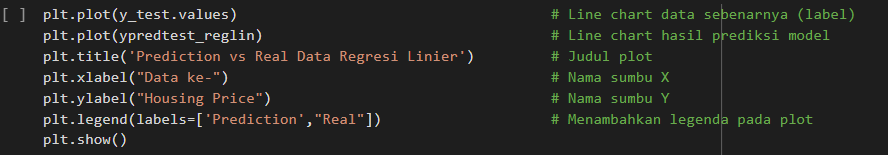

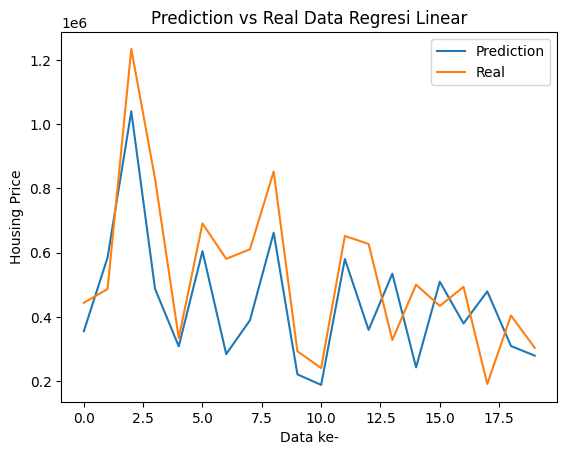

In [24]:
plt.plot(Y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_reglin)                                #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Linear')       #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

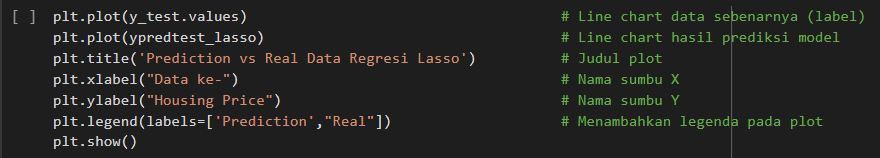

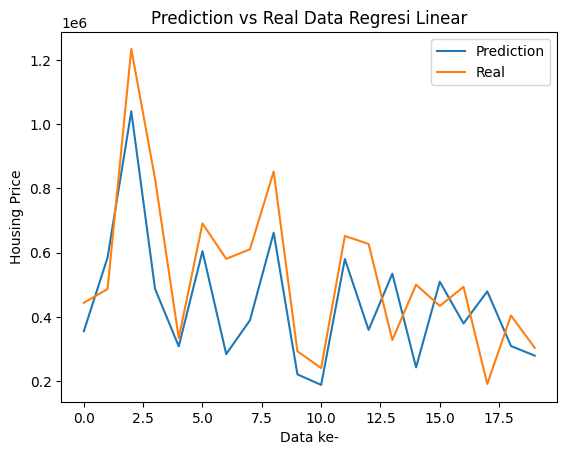

In [25]:
plt.plot(Y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_lasso)                                 #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Linear')       #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

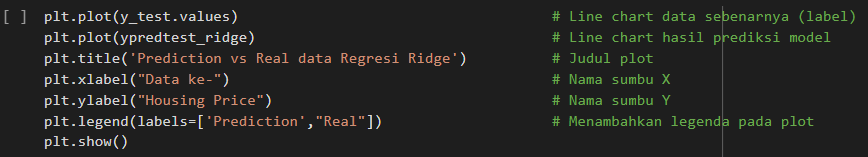

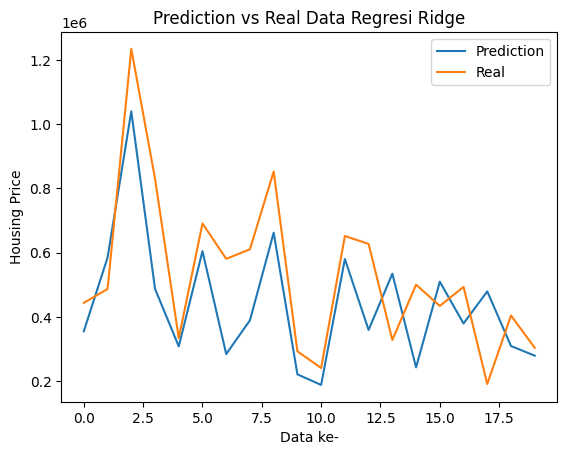

In [27]:
plt.plot(Y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_ridge)                                 #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Ridge')        #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()


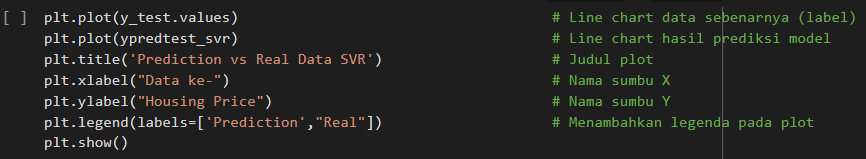

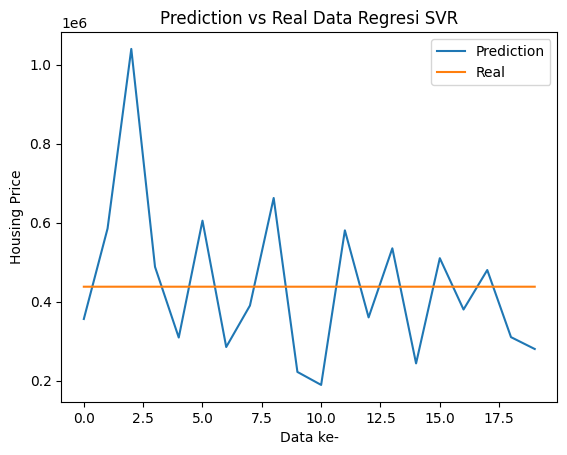

In [28]:
plt.plot(Y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_svr)                                   #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi SVR')          #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

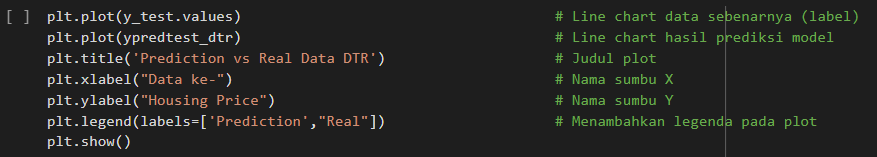

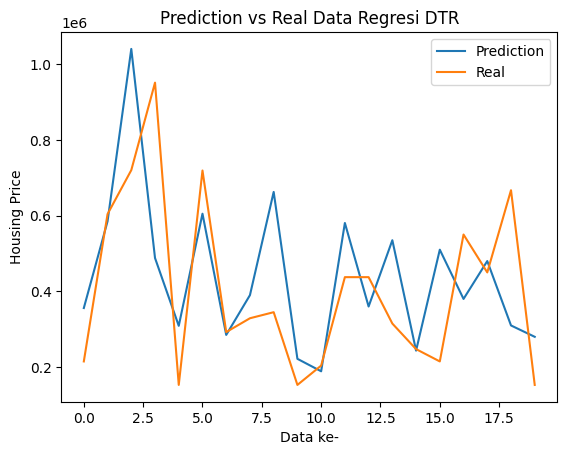

In [29]:
plt.plot(Y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_dtr)                                   #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi DTR')          #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

# Kesimpulan

Model DTR merupakan model terbaik berdasarkan hasil evaluasi menggunakan metrics MSE dan R^2.

Model DTR selanjutnya kita pilih untuk memprediksi data baru.

Model DTR juga sudah bisa kita deploy. Materi deployment akan disampaikan saat AI Domain.

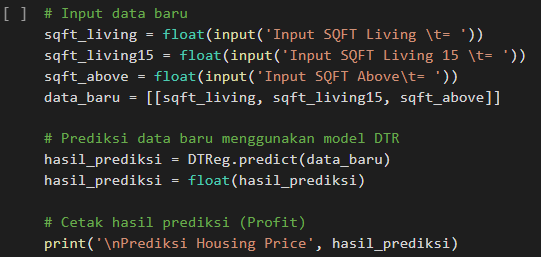

In [31]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Assuming you have your features (X) and target (Y) data ready
# Replace 'X' and 'Y' with your actual data variables
# X = ...
# Y = ...

# Create and train the Decision Tree Regression model
DTreg = DecisionTreeRegressor()  # Initialize the model
DTreg.fit(X, Y)  # Train the model using your data

# input data baru
sqfr_living = float(input('Input SQFT Living \t = '))
sqfr_living15 = float(input('Input SQFT Living 15 \t = '))
sqfr_above = float(input('Input SQFT Above \t = '))
data_baru = [[sqfr_living, sqfr_living15, sqfr_above]]

#prediksi data baru menggunakan model DTR
hasil_prediksi = DTreg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

#cetak hasil prediksi (profit)
print('\nPrediksi Housing Price', hasil_prediksi)

Input SQFT Living 	 = 8
Input SQFT Living 15 	 = 4
Input SQFT Above 	 = 5

Prediksi Housing Price 480000.0


# Exercise (Latihan)

1. Download dataset [di sini](https://drive.google.com/file/d/1ir-ilrC_m4XAny9tklloJc52oLITjUGy/view?usp=sharing).

2. Buat model regresi linier dan model regresi lainnya menggunakan dataset tersebut!
3. Evaluasi setiap model!
4. Tentukan dan jelaskan model yang paling baik!

# **Import library**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# **Load Dataset**

In [43]:
import pandas as pd

# Assuming you've downloaded the file as 'insurance.csv'
file_id = '1ir-ilrC_m4XAny9tklloJc52oLITjUGy'
csv_url = f'https://docs.google.com/uc?export=download&id={file_id}'

dataset = pd.read_csv(csv_url)
dataset.head()

,total_rooms,housing_median_age,population,median_house_value
0,880.0,41.0,322.0,452600.0
1,7099.0,21.0,2401.0,358500.0
2,1467.0,52.0,496.0,352100.0
3,1274.0,52.0,558.0,341300.0
4,1627.0,52.0,565.0,342200.0


# **1. Analisis Korelasi**

In [44]:
dataset.corr()

,total_rooms,housing_median_age,population,median_house_value
total_rooms,1.000000,-0.033254,0.920196,0.253887
housing_median_age,-0.033254,1.000000,-0.062477,0.018831
population,0.920196,-0.062477,1.000000,0.129279
median_house_value,0.253887,0.018831,0.129279,1.000000


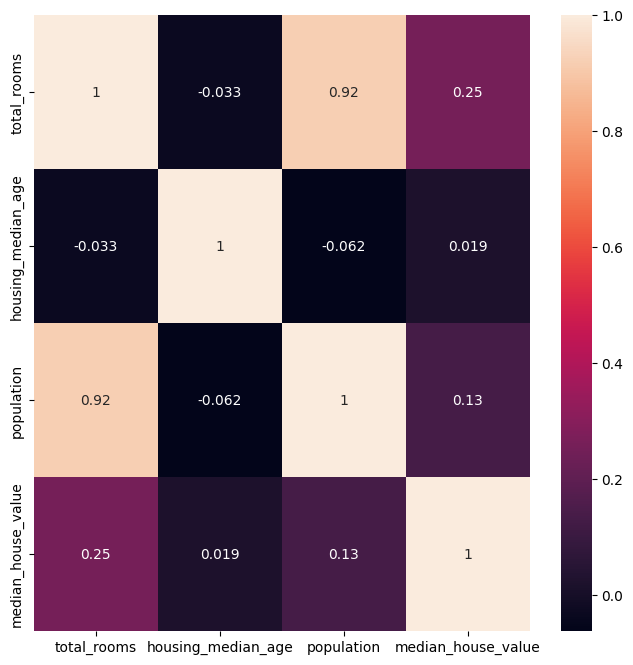

In [45]:
# Import the seaborn library and alias it as 'sns'
import seaborn as sns

# Import the matplotlib.pyplot module for plotting
import matplotlib.pyplot as plt


# Visualisasi menggunakan heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

# **Split Dataset**

In [46]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
print("Ukuran training dan testing data: ")
print("Training dataset :", x_train.shape, y_train.shape)# 80% training data
print("Testing dataset: ", x_test.shape, y_test.shape) # 20% testing data

Ukuran training dan testing data: 
Training dataset : (80, 3) (80,)
Testing dataset:  (20, 3) (20,)


# **2. Modeling**

In [48]:
#Training model Regresi Linear
LinearReg = LinearRegression().fit(x_train, y_train)

#Training model Lasso
LassoReg = Lasso(alpha = 0.1).fit(x_train, y_train)

#Training model Ridge
RidgeReg = Ridge(alpha = 0.1).fit(x_train, y_train)

#Training model Support Vectore Regression (SVR)
SVReg = SVR().fit(x_train, y_train)

#Training model Decision Tree Regression (DTR)
DTReg = DecisionTreeRegressor(random_state=47).fit(x_train, y_train)

# **3. Evaluasi model mengunakan metric MSE dan R2**

In [49]:
#Hasil Prediksi model Regresi Linear
ypredtrain_reglin = LinearReg.predict(x_train)
ypredtest_reglin = LinearReg.predict(x_test)

#hasil prediksi model Lasso
ypredtrain_lasso = LassoReg.predict(x_train)
ypredtest_lasso = LassoReg.predict(x_test)

#Hasil Prediksi model Ridge
ypredtrain_ridge = RidgeReg.predict(x_train)
ypredtest_ridge = RidgeReg.predict(x_test)

#hasil prediksi Support Vectore Regression (SVR)
ypredtrain_svr = SVReg.predict(x_train)
ypredtest_svr = SVReg.predict(x_test)

#hasil prediksi Decision Tree Regression (DTR)
ypredtrain_dtr = DTReg.predict(x_train)
ypredtest_dtr = DTReg.predict(x_test)


In [51]:
# MSE model Regresi Linier
print('Nilai MSE data training Regresi Linier = ', mean_squared_error(y_train, ypredtrain_reglin))
print('Nilai MSE data testing Regresi Linier = ', mean_squared_error(y_test, ypredtest_reglin), '\n')

# MSE model Lasso
print('Nilai MSE data training Regresi Lasso = ', mean_squared_error(y_train, ypredtrain_lasso))
print('Nilai MSE data testing Regresi Lasso = ', mean_squared_error(y_test, ypredtest_lasso), '\n')

# MSE model Ridge
print('Nilai MSE data training Regresi Ridge = ', mean_squared_error(y_train, ypredtrain_ridge))
print('Nilai MSE data testing Regresi Ridge = ', mean_squared_error(y_test, ypredtest_ridge), '\n')

# MSE model SVR
print('Nilai MSE data training SVR = ', mean_squared_error(y_train, ypredtrain_svr))
print('Nilai MSE data testing SVR = ', mean_squared_error(y_test, ypredtest_svr), '\n')

# MSE model DTR
print('Nilai MSE data training DTR = ', mean_squared_error(y_train, ypredtrain_dtr))
print('Nilai MSE data testing DTR = ', mean_squared_error(y_test, ypredtest_dtr), '\n')


Nilai MSE data training Regresi Linier =  4803094063.322078
Nilai MSE data testing Regresi Linier =  8127181805.970065 

Nilai MSE data training Regresi Lasso =  4803094063.322152
Nilai MSE data testing Regresi Lasso =  8127181788.923589 

Nilai MSE data training Regresi Ridge =  4803094063.322078
Nilai MSE data testing Regresi Ridge =  8127181827.757988 

Nilai MSE data training SVR =  5948408542.012653
Nilai MSE data testing SVR =  9903742443.12862 

Nilai MSE data training DTR =  0.0
Nilai MSE data testing DTR =  14219714500.0 



In [52]:
# R^2 Score
print(f'R^2 score Regresi Linier : {LinearReg.score(x, y)}')
print(f'R^2 score Regresi Lasso : {LassoReg.score(x, y)}')
print(f'R^2 score Regresi Ridge :{RidgeReg.score(x, y)}')
print(f'R^2 score Regresi SVR :{SVReg.score(x, y)}')
print(f'R^2 score Regresi Dt :{DTReg.score(x, y)}')

R^2 score Regresi Linier : 0.1312824745405794
R^2 score Regresi Lasso : 0.1312824750822238
R^2 score Regresi Ridge :0.13128247384826552
R^2 score Regresi SVR :-0.0707379234400054
R^2 score Regresi Dt :0.5481669759838637


# **Visualisasi Hasil Prediksi dengan data sebenarmya**

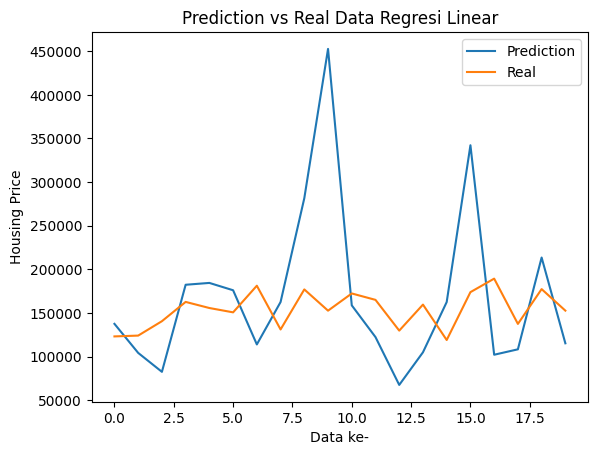

In [53]:
plt.plot(y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_reglin)                                #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Linear')       #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

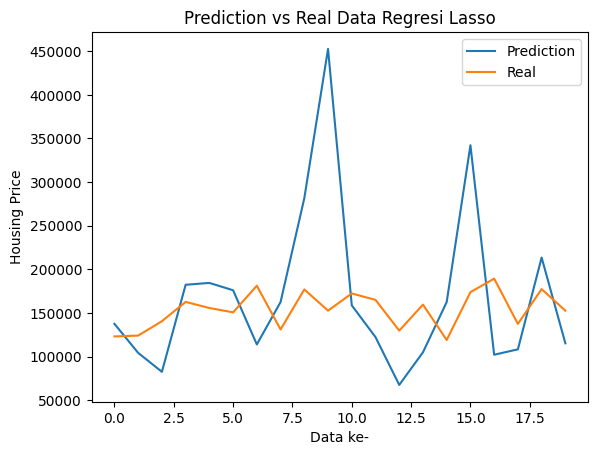

In [56]:
plt.plot(y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_lasso)                                 #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Lasso')       #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

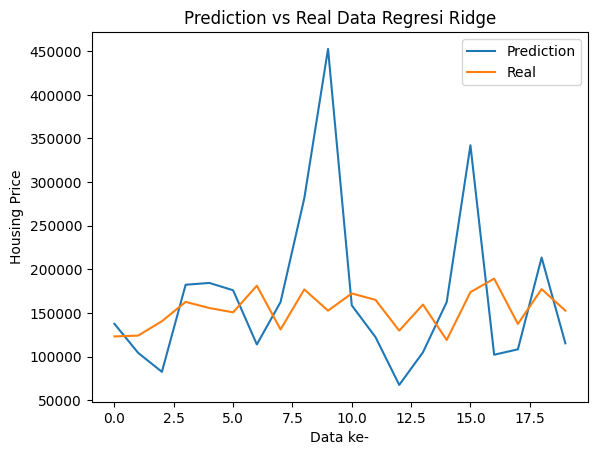

In [58]:
plt.plot(y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_ridge)                                 #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi Ridge')        #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

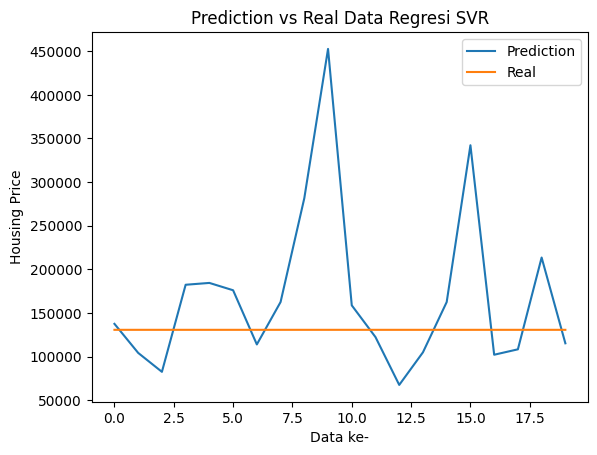

In [59]:
plt.plot(y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_svr)                                   #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi SVR')          #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

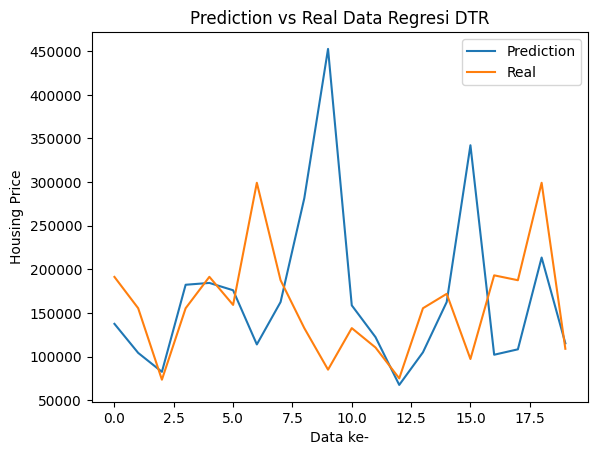

In [60]:
plt.plot(y_test.values)                                   #Line Chart data sebenarnya (label)
plt.plot(ypredtest_dtr)                                   #line chart hasil prediksi model
plt.title('Prediction vs Real Data Regresi DTR')          #judul plot
plt.xlabel("Data ke-")                                    # Nama sumbu X
plt.ylabel("Housing Price")                               # nama sumbu Y
plt.legend(labels=['Prediction',"Real"])                  #menambahkan legenda pada plot
plt.show()

# **Kesimpulan**

In [63]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Assuming you have your features (X) and target (Y) data ready
# Replace 'X' and 'Y' with your actual data variables
# X = ...
# Y = ...

# Create and train the Decision Tree Regression model
DTreg = DecisionTreeRegressor()  # Initialize the model
DTreg.fit(x, y)  # Train the model using your data

# input data baru
total_rooms = float(input('Input Total rooms \t = '))
housing_median_age = float(input('Input Housing Median Age ='))
population = float(input('Input Population \t = '))
dataset_baru = [[total_rooms, housing_median_age, population]]

#prediksi data baru menggunakan model DTR
hasil_prediksi = DTreg.predict(dataset_baru)
hasil_prediksi = float(hasil_prediksi)

#cetak hasil prediksi (profit)
print('\nPrediksi Housing Median House Value', hasil_prediksi)

Input Total rooms 	 = 4
Input Housing Median Age =0.1
Input Population 	 = 5

Prediksi Housing Median House Value 60000.0
